In [148]:
import numpy as np
import matplotlib.pyplot as plt

In [149]:
# confirm Part A answer
print("This part is checking the written answer to part A")

outcomes = ['L', 'E', 'G']

die_max = 6
N = len(outcomes)

prior = np.ones(die_max)/die_max
posterior = np.zeros(die_max)
print_bool = True

for i in range(N):
    if outcomes[i] == 'L':
        likelihoods = np.arange(die_max)/die_max
    if outcomes[i] == 'G':
        likelihoods = np.arange(die_max)[::-1]/die_max
    if outcomes[i] == 'E':
        likelihoods = np.ones(die_max)/die_max
    marginal_probability = np.dot(prior, likelihoods)
    
    posterior = prior*likelihoods/marginal_probability
    
    if print_bool == True:
        #print(f"Outcome: {outcomes[i]}, now the target is most likely: T = {np.argmax(posterior) +1} with probability {np.max(posterior)}\n")    
        print(f"Current outcome: {outcomes[i]} ")
        print(f"Done looking at first {i+1} datapoints")
        header = "{:<5} {:<10} {:<15} {:<15} {:<10} {:<5}".format("T", "P[T]", "P[D|T]", "P[T]P[D|T]", "P[T|D]", "Most likely target, given the data")
        print(header)
        print("-" * len(header))  # Separator
        
        max_index = np.argmax(posterior)
        
        for k in range(len(prior)):
            likelihood = likelihoods[k]
            unnormalized_posterior = prior[k]*likelihood
            arrow = "<---" if k == max_index else ""
            row = "{:<5} {:<10.7f} {:<15.7f} {:<15.7f} {:<10.7f} {:<5}".format(
                k+1, prior[k], likelihood, unnormalized_posterior, posterior[k], arrow
            )
            print(row)
        print()
    prior = posterior

This part is checking the written answer to part A
Current outcome: L 
Done looking at first 1 datapoints
T     P[T]       P[D|T]          P[T]P[D|T]      P[T|D]     Most likely target, given the data
----------------------------------------------------------------------------------------------
1     0.1666667  0.0000000       0.0000000       0.0000000       
2     0.1666667  0.1666667       0.0277778       0.0666667       
3     0.1666667  0.3333333       0.0555556       0.1333333       
4     0.1666667  0.5000000       0.0833333       0.2000000       
5     0.1666667  0.6666667       0.1111111       0.2666667       
6     0.1666667  0.8333333       0.1388889       0.3333333  <--- 

Current outcome: E 
Done looking at first 2 datapoints
T     P[T]       P[D|T]          P[T]P[D|T]      P[T|D]     Most likely target, given the data
----------------------------------------------------------------------------------------------
1     0.0000000  0.1666667       0.0000000       0.0000000    

In [150]:
# Part B
outcomes = ['G', 'G', 'G', 'G', 'L','E', 'L', 'G', 'L', 
            'L', 'G', 'E', 'G', 'E', 'G', 'E', 'G', 'G',
            'L', 'L', 'G', 'G', 'L', 'L', 'G', 'G', 'G', 
            'E', 'G', 'G']

die_max = 6                           # maximum die outcome
N       = len(outcomes)               # number of outcomes

prior      = np.ones(die_max)/die_max # store priors
posterior  = np.zeros(die_max)        # store posteriors
print_bool = True                     # print or not, False/True
posterior_list = []
for i in range(N):
    if outcomes[i] == 'L':
        likelihoods = np.arange(die_max)/die_max        # P[L|T]
    if outcomes[i] == 'G':
        likelihoods = np.arange(die_max)[::-1]/die_max  # P[G|T]
    if outcomes[i] == 'E':
        likelihoods = np.ones(die_max)/die_max          # P[E|T]
    
    marginal_probability = np.dot(prior, likelihoods)   # P[D]
    
    posterior = prior*likelihoods/marginal_probability  # P[T|D]
    
    if print_bool == True:
        if (i+1) % 5 == 0 and i != 0:
            print(f"Current outcome: {outcomes[i]} ")
            print(f"Done looking at first {i+1} datapoints")
            header = "{:<5} {:<10} {:<15} {:<15} {:<10} {:<5}".format("T", "P[T]", 
                                                "P[D|T]", "P[T]P[D|T]", 
                                                "P[T|D]", 
                                                "Most likely target, given the data")
            print(header)
            print("-" * len(header))  # Separator
            # max index is the target with the highest posterior probability
            max_index = np.argmax(posterior) 
            
            for k in range(len(prior)):
                likelihood = likelihoods[k]                   # P[D|T]
                unnormalized_posterior = prior[k]*likelihood  # P[T]P[D|T]
                # print an arrow pointing at most likely target (max posterior)
                arrow = "<---" if k == max_index else ""      
                row = "{:<5} {:<10.7f} {:<15.7f} {:<15.7f} {:<10.7f} {:<5}".format(
                k+1, prior[k], likelihood, unnormalized_posterior, posterior[k], arrow
                )
                print(row)
            print()
    posterior_list.append(posterior)
    prior = posterior # update the prior probabilities

Current outcome: L 
Done looking at first 5 datapoints
T     P[T]       P[D|T]          P[T]P[D|T]      P[T|D]     Most likely target, given the data
----------------------------------------------------------------------------------------------
1     0.6384065  0.0000000       0.0000000       0.0000000       
2     0.2614913  0.1666667       0.0435819       0.5446809  <--- 
3     0.0827375  0.3333333       0.0275792       0.3446809       
4     0.0163432  0.5000000       0.0081716       0.1021277       
5     0.0010215  0.6666667       0.0006810       0.0085106       
6     0.0000000  0.8333333       0.0000000       0.0000000       

Current outcome: L 
Done looking at first 10 datapoints
T     P[T]       P[D|T]          P[T]P[D|T]      P[T|D]     Most likely target, given the data
----------------------------------------------------------------------------------------------
1     0.0000000  0.0000000       0.0000000       0.0000000       
2     0.2628337  0.1666667       0.0438056    

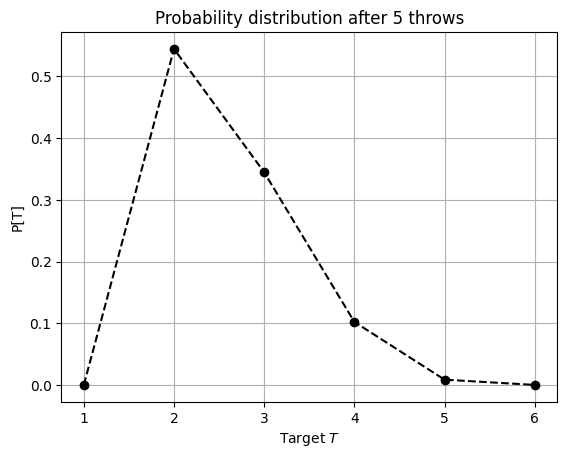

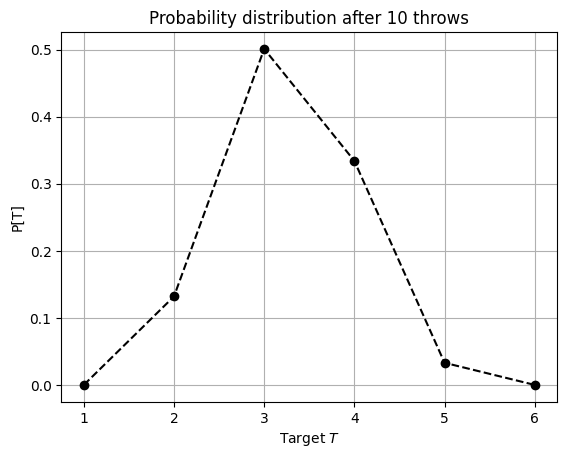

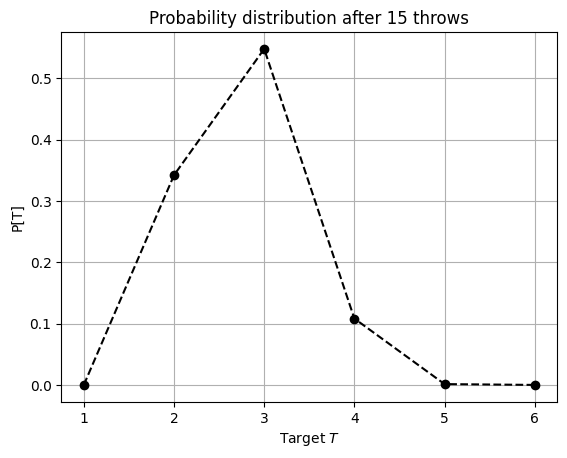

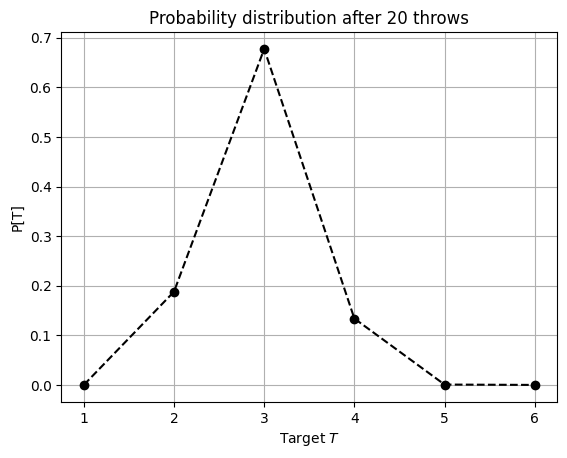

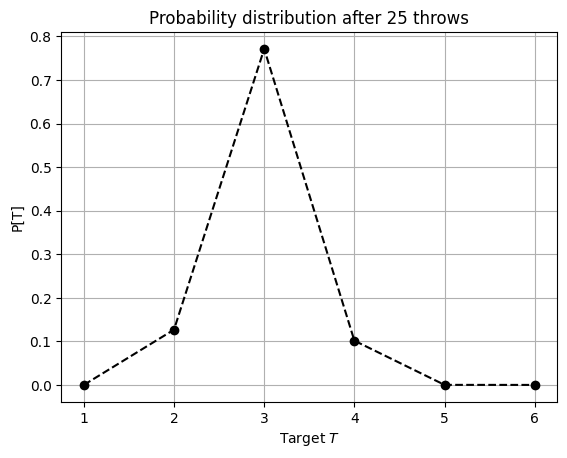

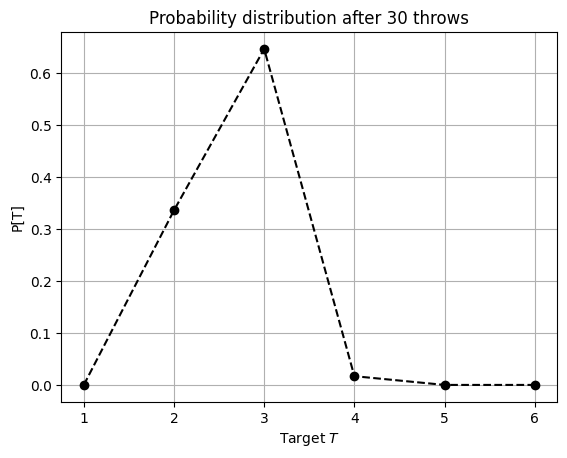

In [151]:
posterior_array = np.array(posterior_list)
for i in range(N):
    if (i+1) % 5 == 0 and i != 0:
        plt.title(f"Probability distribution after {i+1} throws")
        plt.xlabel("Target $T$")
        plt.ylabel(f"P[T]")
        plt.grid()
        plt.plot(np.arange(len(posterior_array[i,:]))+1, posterior_array[i,:], '--o', c = 'k')
        
        # Save the figure as a PDF file
        #plt.savefig(f"plot_{i+1}_pre_outcomes_dist.pdf", format="pdf", bbox_inches='tight')
        
        plt.show()

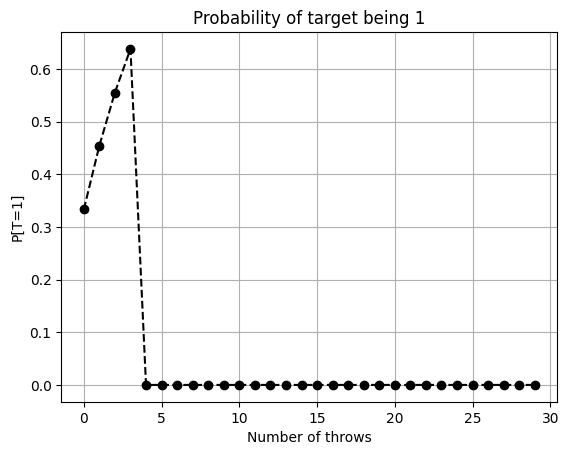

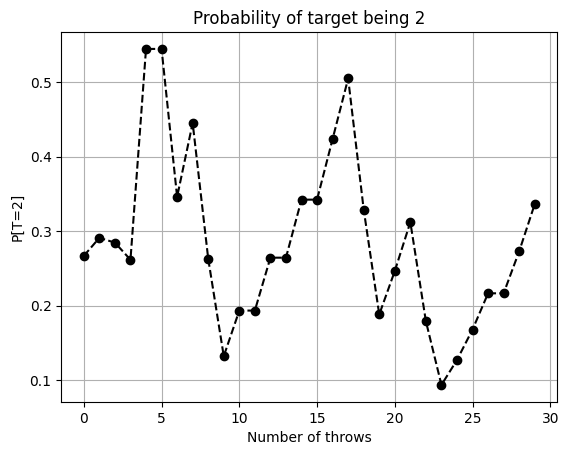

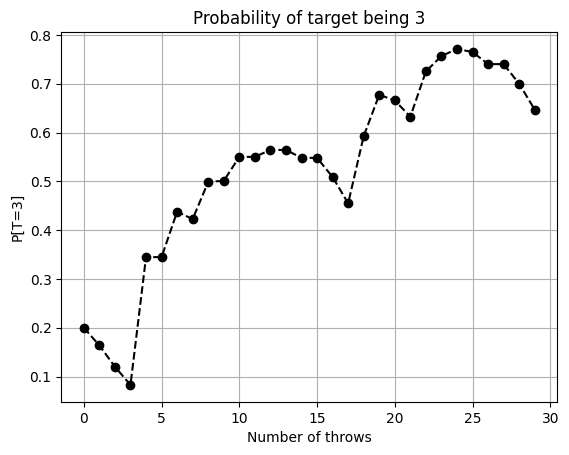

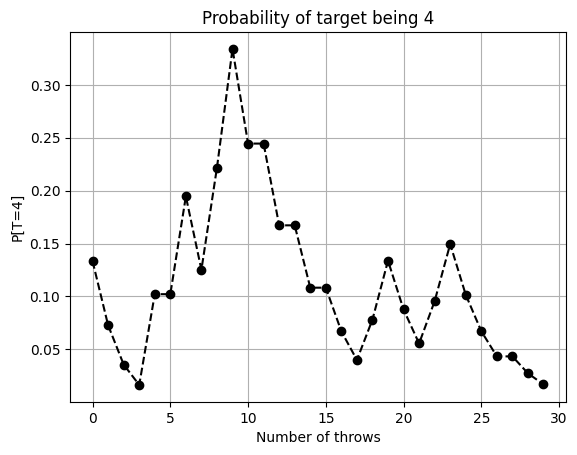

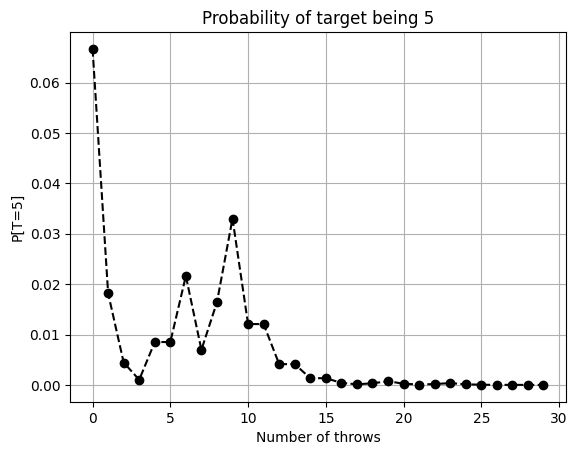

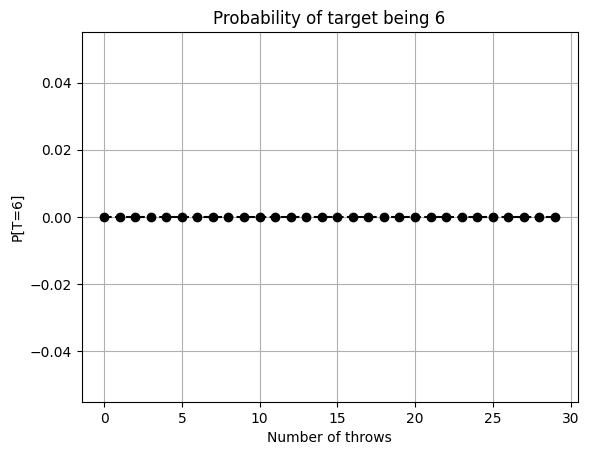

In [152]:
for i in range(die_max):
    plt.title(f"Probability of target being {i+1}")
    plt.xlabel("Number of throws")
    plt.ylabel(f"P[T={i+1}]")
    plt.grid()
    plt.plot(np.arange(len(posterior_array[:,i])), posterior_array[:,i], '--o', c = 'k')
    # Save the figure as a PDF file
    #plt.savefig(f"plot_{i+1}_pre_outcomes_evolution.pdf", format="pdf", bbox_inches='tight')
    plt.show()
    

# Generating random sequence

In [153]:
# Pick target, generate random sequence, then estimate target
np.random.seed(123)
target = 5
n_outcomes = 30
roll_dice = np.random.choice(range(1, 7), size=n_outcomes, replace=True)
outcomes = ['G' if i > target else 'E' if i == target else 'L' for i in roll_dice]

print(f"Target is:   {target}")
print(f"Rolling dice {n_outcomes} times...")
print(f"Dice roll outcome: {roll_dice}")
print(f"G, E, L: {outcomes}")


die_max = 6
N = len(outcomes)

prior = np.ones(die_max)/die_max
posterior = np.zeros(die_max)
print_bool = True
posterior_list = []
for i in range(N):
    
    if outcomes[i] == 'L':
        likelihoods = np.arange(die_max)/die_max
    if outcomes[i] == 'G':
        likelihoods = np.arange(die_max)[::-1]/die_max
    if outcomes[i] == 'E':
        likelihoods = np.ones(die_max)/die_max
    marginal_probability = np.dot(prior, likelihoods)
    
    posterior = prior*likelihoods/marginal_probability
    
    if print_bool == True:
        #print(f"Outcome: {outcomes[i]}, now the target is most likely: T = {np.argmax(posterior) +1} with probability {np.max(posterior)}\n")    
        if (i+1) % 5 == 0 and i != 0:
            print(f"Current outcome: {outcomes[i]} ")
            print(f"Done looking at first {i+1} datapoints")
            header = "{:<5} {:<10} {:<15} {:<15} {:<10} {:<5}".format("T", "P[T]", "P[D|T]", "P[T]P[D|T]", "P[T|D]", "Most likely target, given the data")
            print(header)
            print("-" * len(header))  # Separator
            
            max_index = np.argmax(posterior)
            
            for k in range(len(prior)):
                likelihood = likelihoods[k]
                unnormalized_posterior = prior[k]*likelihood
                arrow = "<---" if k == max_index else ""
                row = "{:<5} {:<10.7f} {:<15.7f} {:<15.7f} {:<10.7f} {:<5}".format(
                    k+1, prior[k], likelihood, unnormalized_posterior, posterior[k], arrow
                )
                print(row)
            print()
    posterior_list.append(posterior)
    prior = posterior


Target is:   5
Rolling dice 30 times...
Dice roll outcome: [6 3 5 3 2 4 3 4 2 2 1 2 2 1 1 2 4 6 5 1 1 5 2 4 3 5 3 5 1 6]
G, E, L: ['G', 'L', 'E', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'G', 'E', 'L', 'L', 'E', 'L', 'L', 'L', 'E', 'L', 'E', 'L', 'G']
Current outcome: L 
Done looking at first 5 datapoints
T     P[T]       P[D|T]          P[T]P[D|T]      P[T|D]     Most likely target, given the data
----------------------------------------------------------------------------------------------
1     0.0000000  0.0000000       0.0000000       0.0000000       
2     0.0800000  0.1666667       0.0133333       0.0273973       
3     0.2400000  0.3333333       0.0800000       0.1643836       
4     0.3600000  0.5000000       0.1800000       0.3698630       
5     0.3200000  0.6666667       0.2133333       0.4383562  <--- 
6     0.0000000  0.8333333       0.0000000       0.0000000       

Current outcome: L 
Done looking at first 10 datapoints
T     P[T]       P[D|

Actual target is: 5!!


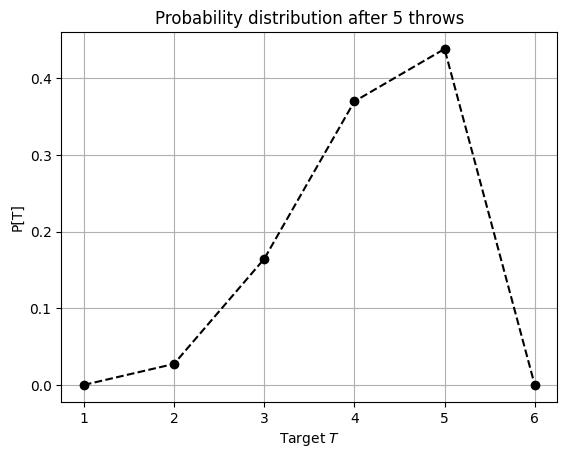

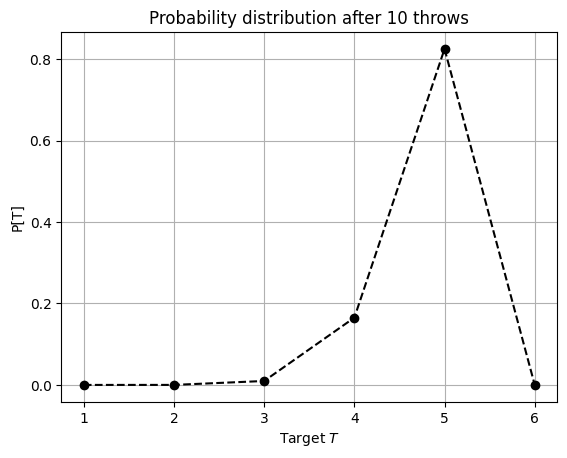

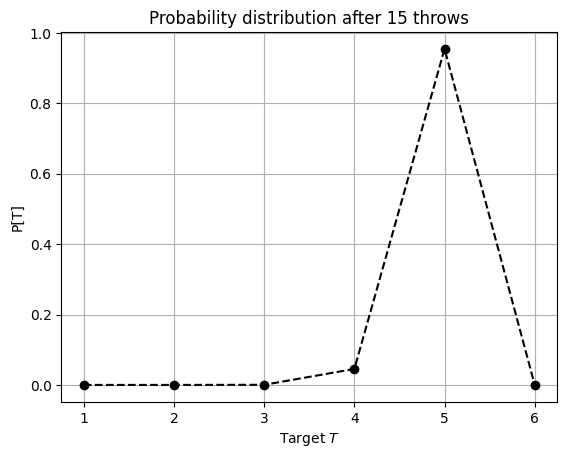

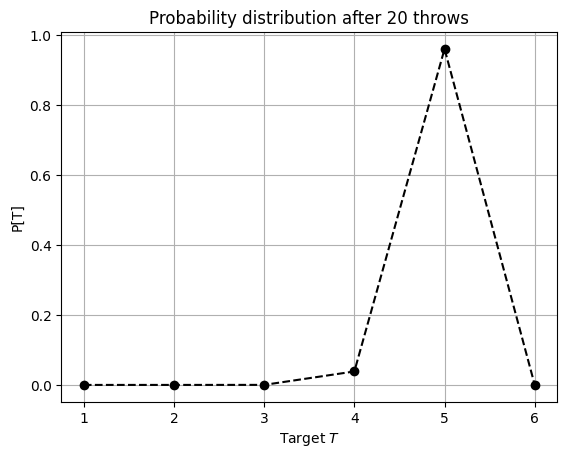

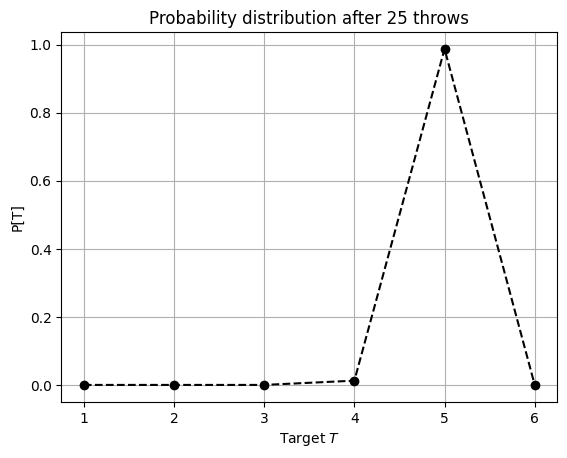

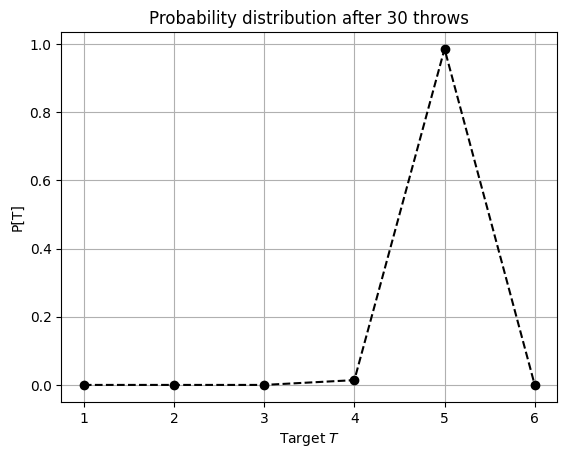

In [154]:
posterior_array = np.array(posterior_list)
print(f"Actual target is: {target}!!")
for i in range(N):
    if (i+1) % 5 == 0 and i != 0:
        plt.title(f"Probability distribution after {i+1} throws")
        plt.xlabel("Target $T$")
        plt.ylabel(f"P[T]")
        plt.grid()
        plt.plot(np.arange(len(posterior_array[i,:]))+1, posterior_array[i,:], '--o', c = 'k')
        
        # Save the figure as a PDF file
        #plt.savefig(f"plot_{i+1}_random_outcomes_dist.pdf", format="pdf", bbox_inches='tight')
        
        plt.show()

Actual target is: 5!!


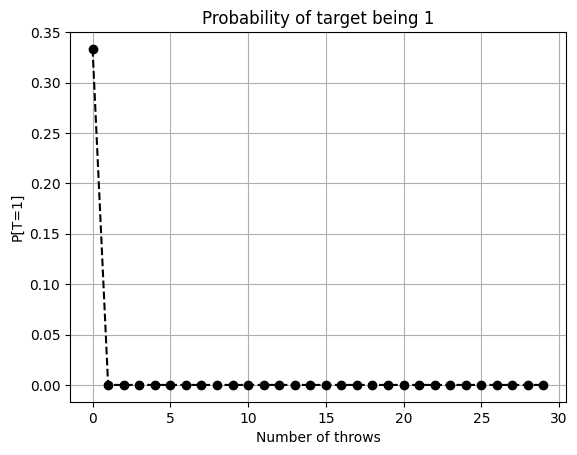

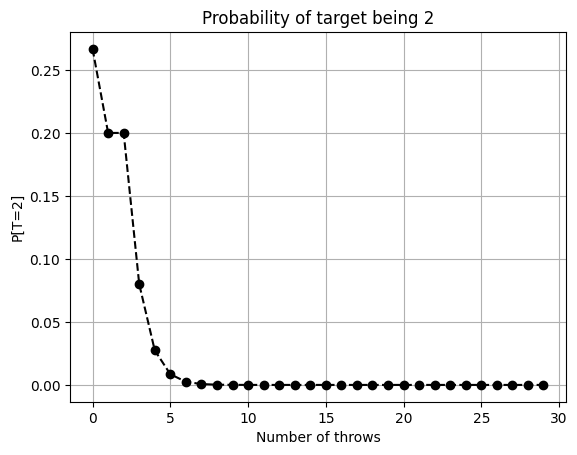

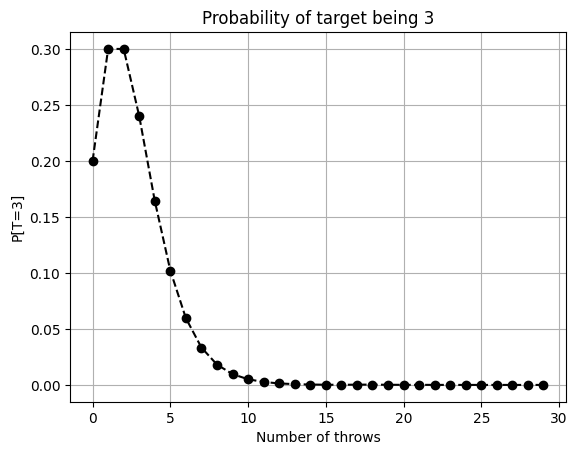

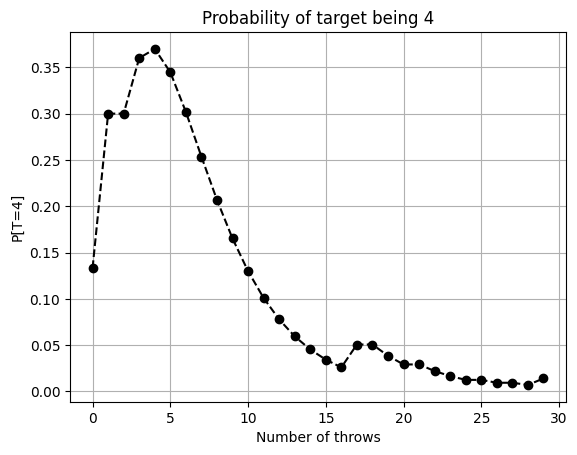

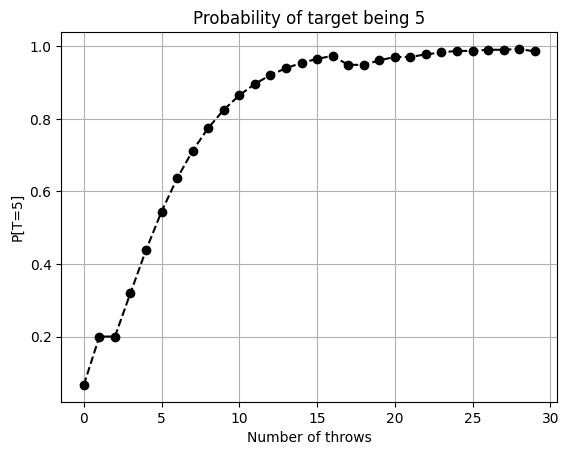

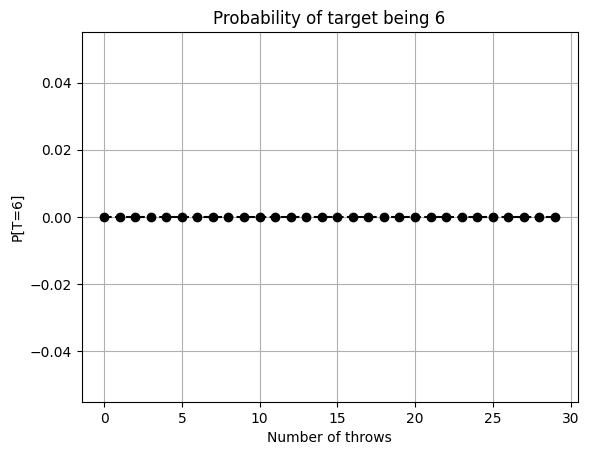

In [155]:
print(f"Actual target is: {target}!!")
for i in range(die_max):
    plt.title(f"Probability of target being {i+1}")
    plt.xlabel("Number of throws")
    plt.ylabel(f"P[T={i+1}]")
    plt.grid()
    plt.plot(np.arange(len(posterior_array[:,i])), posterior_array[:,i], '--o', c = 'k')
    # Save the figure as a PDF file
    #plt.savefig(f"plot_{i+1}_random_outcomes_evolution.pdf", format="pdf", bbox_inches='tight')
    plt.show()
    